# Understanding the dataset
    

In [1]:
import pandas as pd
import scipy.stats as stats
from pandas import read_csv
data=read_csv("Book1.csv")
#data=data.age.dropna()
data.shape
data.head()
#data=int(data[data['expert_opinion']])

,expert_opinion,age,incorporation_type,continous_feature_1,continous_feature_2,continous_feature_3,continous_feature_4,continous_feature_5,continous_feature_6,continous_feature_7,...,continous_feature_20,continous_feature_21,continous_feature_22,continous_feature_23,continous_feature_24,continous_feature_25,continous_feature_26,continous_feature_27,continous_feature_28,continous_feature_29
0,0,24.0,sp_zoo,5.740930e+05,0.0,0,0.0000,0.0,0,0,...,0.0,33.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1,1,6.0,sp_zoo,2.270302e+04,0.0,0,-140.0000,0.0,0,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,28.0,dzialalnosc_gospodarcza,1.192940e+05,0.0,0,0.0000,-894.0,2,0,...,0.0,39.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
3,1,55.0,dzialalnosc_gospodarcza,1.251916e+06,0.0,1,0.0000,-2360.0,1,0,...,0.0,30.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
4,1,39.0,dzialalnosc_gospodarcza,2.266025e+05,0.0,0,-100870.2861,-88.0,1,0,...,0.0,26.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


### breaking dataset into 2 dataset one for being accepted (1) and other for not being accepted (0)

In [2]:

cat1=data.loc[data['expert_opinion'] == 1]
cat0=data.loc[data['expert_opinion'] == 0]
#cat1=cat1.loc[cat1.age.dropna()]
#cat0=cat1.loc[cat0.age.dropna()]
#cat1('age')
#cat0.head()
print(cat1.shape)
print(cat0.shape)

(1453, 32)
(1207, 32)


In [3]:
#no. of null values
print(cat1.isnull().sum())

expert_opinion            0
age                       8
incorporation_type        4
continous_feature_1      76
continous_feature_2       0
continous_feature_3       0
continous_feature_4       0
continous_feature_5       0
continous_feature_6       0
continous_feature_7       0
continous_feature_8       0
continous_feature_9      50
continous_feature_10      0
continous_feature_11    104
continous_feature_12    104
continous_feature_13    107
continous_feature_14      0
continous_feature_15    107
continous_feature_16      0
continous_feature_17    106
continous_feature_18    106
continous_feature_19      0
continous_feature_20      0
continous_feature_21    561
continous_feature_22    561
continous_feature_23    427
continous_feature_24    427
continous_feature_25    427
continous_feature_26    427
continous_feature_27    427
continous_feature_28    427
continous_feature_29    427
dtype: int64


In [4]:
#converting dataset into two sub datasets one with a accepted other not accepted
import pandas as pd
cat0 = cat0[pd.notnull(cat0['age'])]
cat1= cat1[pd.notnull(cat1['age'])]


In [5]:
#confirming any null still there
print(cat0.age.isnull().sum())
print(cat1.age.isnull().sum())
cat1.shape

0
0


(1445, 32)

# Apply t-test for 

1. Check for Normality & Variance criteria

    The first step when applying statistical controls is to check the normality and variance criteria

    (a) Normality

            To test for normality, apply the Shapiro-Wilk test by calling the scipy stats.shapiro() method
            This control tests the null hypothesis that the data was drawn from a normal distribution and returns the test statistic ('W') and the probability ('p').
            The normality criterion holds true when p > a (where a is the probability threshold usually set to 0.05)
    (b) Important: be sure to call the dropna() method on your data set to drop NaN values during testing


In [8]:
# Shapiro-Wilk normality test for data
stats.shapiro(data.age.dropna())

(0.7594555020332336, 0.0)

In [9]:
# Shapiro-Wilk normality test for cat1
print(stats.shapiro(cat1.age))

# Shapiro-Wilk normality test for cat0
print(stats.shapiro(cat0.age))


(0.7405530214309692, 9.72501134241423e-43)
(0.7764235734939575, 1.1126504867485282e-37)


In [10]:
cat01=cat0[cat0.age != 0]
cat11=cat1[cat1.age != 0]
print(cat11.shape)
print(cat01.shape)

(1422, 32)
(1206, 32)


In [11]:
cat01.describe()


,expert_opinion,age,continous_feature_1,continous_feature_2,continous_feature_3,continous_feature_4,continous_feature_5,continous_feature_6,continous_feature_7,continous_feature_8,...,continous_feature_20,continous_feature_21,continous_feature_22,continous_feature_23,continous_feature_24,continous_feature_25,continous_feature_26,continous_feature_27,continous_feature_28,continous_feature_29
count,1206.0,1206.000000,1.172000e+03,1.206000e+03,1206.000000,1.206000e+03,1.206000e+03,1206.000000,1206.000000,1206.000000,...,1206.000000,694.000000,694.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000
mean,0.0,66.731343,7.573396e+05,1.105654e+04,0.841625,-1.094109e+05,-2.131751e+04,2.790216,-87.793532,-2585.894760,...,317.816331,38.144092,0.259366,0.851980,0.845104,0.027105,0.861310,0.178201,0.891580,1.239908
std,0.0,71.577721,1.272786e+06,6.752301e+04,4.060206,4.729947e+05,1.057545e+05,5.769423,2884.929413,15720.565506,...,4346.064272,11.629787,0.438603,0.353333,0.357279,0.161195,0.341332,0.382525,0.311089,1.569815
min,0.0,1.000000,4.561364e+02,0.000000e+00,0.000000,-1.321441e+07,-2.594612e+06,0.000000,-100100.000000,-336848.000000,...,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,18.000000,1.490873e+05,0.000000e+00,0.000000,-8.726125e+04,-8.393250e+03,0.000000,0.000000,0.000000,...,0.000000,30.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,0.0,41.000000,3.571961e+05,0.000000e+00,0.000000,-1.461200e+04,-4.250000e+01,1.000000,0.000000,0.000000,...,0.000000,35.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,0.0,84.000000,8.539633e+05,2.346250e+03,1.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,0.000000,...,0.000000,44.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,0.0,353.000000,1.663830e+07,2.034370e+06,110.000000,0.000000e+00,0.000000e+00,136.000000,0.000000,0.000000,...,121085.440000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000


#### Conclusion:   Since p <0.05 for both data sets, they both failsto the normality criterion

##### (b) Variance
To test for variance, apply the Levene test by calling the scipy stats.levene() method. This control tests tests the null hypothesis that all samples come from populations with equal variances. It returns the test statistic ('W') and the probabilyt ('p'). The variance criterion holds true when p > a (where a is the probability threshold usually set to 0.05)



In [12]:
# Levene variance test for Control and Treatment groups 
stats.levene(cat1.age.dropna(), cat0.age.dropna())

LeveneResult(statistic=3.9554312799017173, pvalue=0.04682302213159964)

##### as p is appx 0.05 seems test fails variance criteria


#### Conclusion: Since niether normality criteria applied neither the variance criteria met so can't proceed with t test unless transformed

# Transform nearly lognormal data to normal using box cox transformation and try again

In [14]:
import matplotlib.pyplot as plt

plt.hist(cat01['age'], bins=100)
plt.show()

<Figure size 640x480 with 1 Axes>

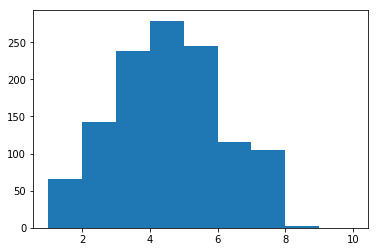

In [16]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
#from sklearn.preprocessing import PowerTransformer

dft01 = stats.boxcox(cat01.age.values)
    
#pt = PowerTransformer(method='box-cox', standardize=False)
#X_trans = pt.fit_transform(cat.age)
#lmbda = round(pt.lambdas_[0], 2)

  # plot the transformed data
plt.hist(dft01[0],bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()

In [17]:
dft01[0]

array([3.76540321, 3.58092905, 4.85612099, ..., 3.03620402, 4.45811599,
       5.52967114])

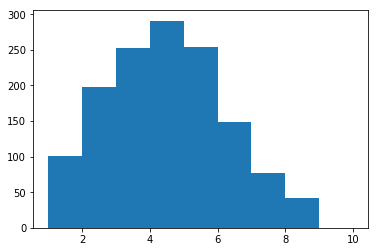

In [18]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
#from sklearn.preprocessing import PowerTransformer

dft11 = stats.boxcox(cat11.age.values)
    
#pt = PowerTransformer(method='box-cox', standardize=False)
#X_trans = pt.fit_transform(cat.age)
#lmbda = round(pt.lambdas_[0], 2)

  # plot the transformed data
plt.hist(dft11[0],bins=[1,2,3,4,5,6,7,8,9,10])
plt.show()

In [19]:
dft01[0]

array([3.76540321, 3.58092905, 4.85612099, ..., 3.03620402, 4.45811599,
       5.52967114])

In [20]:
import scipy.stats
#cat0n = scipy.stats.boxcox(dft01)
stats.shapiro(dft01[0])

(0.9923589825630188, 6.81455094309058e-06)

In [21]:
#xt0, maxlog0, interval = stats.boxcox(cat01.age, alpha=0.05)
#print("lambda = {:g}".format(maxlog0))
scipy.stats.normaltest(dft01[0])

NormaltestResult(statistic=17.66619456419138, pvalue=0.0001458258754234795)

### data still not normal

In [22]:
from scipy.stats import ttest_ind
#filter = df["Tenant"] != ""
#dfNew = df[filter]
#data2= data.age >= 0
#data3= data[data2]
#cat1=data3[data3['expert_opinion'] == 1]
#cat0=data3[data3['expert_opinion']== 0]
#ttest_ind(cat1['age'], cat0['age'])
#cat0
ttest_ind(dft01[0], dft11[0])

Ttest_indResult(statistic=3.137943535201506, pvalue=0.0017202433402076457)

Text(0,0.5,'T_age')

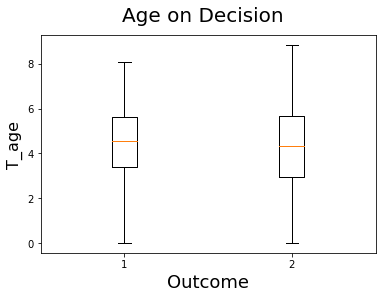

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.boxplot([dft01[0], dft11[0]])
#plt.boxplot ([x1, x2, x3])

#fig = plt.figure()
#plt.plot(data)
plt.suptitle('Age on Decision', fontsize=20)
plt.xlabel('Outcome', fontsize=18)
plt.ylabel('T_age', fontsize=16)
#fig.savefig('test.jpg')


### Conclusion: Above test fails to rejects null hypothesis, we did ttest inspite non normal data so can't be trusted

# Checking for ‘incorporation_type’ IMPACT on being accepted ??

In [25]:
cat0i= cat0[pd.notnull(cat0['incorporation_type'])]


In [27]:
expert_Opi=data.expert_opinion
inc=data.incorporation_type

In [28]:
 pd.crosstab(expert_Opi, inc, rownames=['expert_Opi'], colnames=['incorporation_T'])

incorporation_T,dzialalnosc_gospodarcza,fundacja,sa,sp_cywilna,sp_jawna,sp_komandytowa,sp_komandytowo-akcyjna,sp_zoo,stowarzyszenie
expert_Opi,,,,,,,,,
0,923,2,2,25,5,12,0,238,0
1,1104,4,1,11,6,9,1,312,1


In [29]:
contigency=pd.crosstab(expert_Opi,inc,margins=True)
contigency

incorporation_type,dzialalnosc_gospodarcza,fundacja,sa,sp_cywilna,sp_jawna,sp_komandytowa,sp_komandytowo-akcyjna,sp_zoo,stowarzyszenie,All
expert_opinion,,,,,,,,,,
0,923,2,2,25,5,12,0,238,0,1207
1,1104,4,1,11,6,9,1,312,1,1449
All,2027,6,3,36,11,21,1,550,1,2656


In [30]:
from scipy.stats import chi2_contingency
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)

In [31]:
chi2_contingency(contigency)

(13.142001487687972,
 0.7830689231331012,
 18,
 array([[9.21155497e+02, 2.72665663e+00, 1.36332831e+00, 1.63599398e+01,
         4.99887048e+00, 9.54329819e+00, 4.54442771e-01, 2.49943524e+02,
         4.54442771e-01, 1.20700000e+03],
        [1.10584450e+03, 3.27334337e+00, 1.63667169e+00, 1.96400602e+01,
         6.00112952e+00, 1.14567018e+01, 5.45557229e-01, 3.00056476e+02,
         5.45557229e-01, 1.44900000e+03],
        [2.02700000e+03, 6.00000000e+00, 3.00000000e+00, 3.60000000e+01,
         1.10000000e+01, 2.10000000e+01, 1.00000000e+00, 5.50000000e+02,
         1.00000000e+00, 2.65600000e+03]]))

### p value sugeest no significant difference exist

# imputation using mean

In [32]:
# fill missing values with mean column values
data.fillna(data.mean(), inplace=True)
# count the number of NaN values in each column
print(data.isnull().sum())

expert_opinion          0
age                     0
incorporation_type      4
continous_feature_1     0
continous_feature_2     0
continous_feature_3     0
continous_feature_4     0
continous_feature_5     0
continous_feature_6     0
continous_feature_7     0
continous_feature_8     0
continous_feature_9     0
continous_feature_10    0
continous_feature_11    0
continous_feature_12    0
continous_feature_13    0
continous_feature_14    0
continous_feature_15    0
continous_feature_16    0
continous_feature_17    0
continous_feature_18    0
continous_feature_19    0
continous_feature_20    0
continous_feature_21    0
continous_feature_22    0
continous_feature_23    0
continous_feature_24    0
continous_feature_25    0
continous_feature_26    0
continous_feature_27    0
continous_feature_28    0
continous_feature_29    0
dtype: int64


#### incorporation type need to remove rows as it cant be imputed using mean methods since its a categorical variable

In [6]:
#confirming no NA
data.dropna(inplace=True)
print(data.isnull().sum())

expert_opinion          0
age                     0
incorporation_type      0
continous_feature_1     0
continous_feature_2     0
continous_feature_3     0
continous_feature_4     0
continous_feature_5     0
continous_feature_6     0
continous_feature_7     0
continous_feature_8     0
continous_feature_9     0
continous_feature_10    0
continous_feature_11    0
continous_feature_12    0
continous_feature_13    0
continous_feature_14    0
continous_feature_15    0
continous_feature_16    0
continous_feature_17    0
continous_feature_18    0
continous_feature_19    0
continous_feature_20    0
continous_feature_21    0
continous_feature_22    0
continous_feature_23    0
continous_feature_24    0
continous_feature_25    0
continous_feature_26    0
continous_feature_27    0
continous_feature_28    0
continous_feature_29    0
dtype: int64


In [34]:
data.expert_opinion.value_counts()

1    1449
0    1207
Name: expert_opinion, dtype: int64

In [35]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


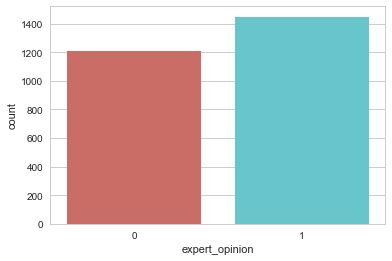

In [36]:
sns.countplot(x=data.expert_opinion, data=data, palette='hls')
plt.show()


In [37]:
data.groupby('expert_opinion').mean()

,age,continous_feature_1,continous_feature_2,continous_feature_3,continous_feature_4,continous_feature_5,continous_feature_6,continous_feature_7,continous_feature_8,continous_feature_9,...,continous_feature_20,continous_feature_21,continous_feature_22,continous_feature_23,continous_feature_24,continous_feature_25,continous_feature_26,continous_feature_27,continous_feature_28,continous_feature_29
expert_opinion,,,,,,,,,,,,,,,,,,,,,
0,66.676056,753339.419825,11047.374775,0.849213,-109362.836832,-21299.848427,2.787904,-87.720795,-2586.158310,175.869433,...,317.553020,37.709550,0.257127,0.854650,0.840175,0.032470,0.854443,0.173316,0.892228,1.237872
1,56.487557,540728.161662,8874.724576,0.601794,-65052.529806,-15989.388551,2.492063,-80.828157,-2211.530749,161.918919,...,233.339614,36.636924,0.251751,0.871413,0.815726,0.057923,0.821013,0.151799,0.899801,1.229571


In [38]:
y=['expert_opinion']

X=[i for i in data if i not in y]
del X[1]
X

['age',
 'continous_feature_1',
 'continous_feature_2',
 'continous_feature_3',
 'continous_feature_4',
 'continous_feature_5',
 'continous_feature_6',
 'continous_feature_7',
 'continous_feature_8',
 'continous_feature_9',
 'continous_feature_10',
 'continous_feature_11',
 'continous_feature_12',
 'continous_feature_13',
 'continous_feature_14',
 'continous_feature_15',
 'continous_feature_16',
 'continous_feature_17',
 'continous_feature_18',
 'continous_feature_19',
 'continous_feature_20',
 'continous_feature_21',
 'continous_feature_22',
 'continous_feature_23',
 'continous_feature_24',
 'continous_feature_25',
 'continous_feature_26',
 'continous_feature_27',
 'continous_feature_28',
 'continous_feature_29']

In [39]:
y

['expert_opinion']

In [40]:
y1=data[y]
type(y1)

pandas.core.frame.DataFrame

In [41]:
X=data[X]
X.head()

,age,continous_feature_1,continous_feature_2,continous_feature_3,continous_feature_4,continous_feature_5,continous_feature_6,continous_feature_7,continous_feature_8,continous_feature_9,...,continous_feature_20,continous_feature_21,continous_feature_22,continous_feature_23,continous_feature_24,continous_feature_25,continous_feature_26,continous_feature_27,continous_feature_28,continous_feature_29
0,24.0,5.740930e+05,0.0,0,0.0000,0.0,0,0,0.000,249.0,...,0.0,33.00000,0.000000,1.000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
1,6.0,2.270302e+04,0.0,0,-140.0000,0.0,0,0,0.000,172.0,...,0.0,37.12169,0.254098,0.864,0.827097,0.046287,0.836451,0.161334,0.896515,1.233369
2,28.0,1.192940e+05,0.0,0,0.0000,-894.0,2,0,0.000,180.0,...,0.0,39.00000,0.000000,1.000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
3,55.0,1.251916e+06,0.0,1,0.0000,-2360.0,1,0,0.000,177.0,...,0.0,30.00000,0.000000,1.000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
4,39.0,2.266025e+05,0.0,0,-100870.2861,-88.0,1,0,-540.319,193.0,...,0.0,26.00000,1.000000,1.000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000


In [42]:
# Normalize the data attributes for the Iris dataset.
from sklearn import preprocessing
# normalize the data attributes
norm_X = preprocessing.normalize(X)
norm_X

array([[4.17847335e-05, 9.99513480e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.74103056e-06, 1.74103056e-06],
       [2.64267621e-04, 9.99945657e-01, 0.00000000e+00, ...,
        7.10589370e-06, 3.94866614e-05, 5.43232279e-05],
       [2.34707359e-04, 9.99970701e-01, 0.00000000e+00, ...,
        0.00000000e+00, 8.38240566e-06, 8.38240566e-06],
       ...,
       [7.90038319e-05, 9.39620091e-01, 4.08133796e-02, ...,
        0.00000000e+00, 5.26692213e-06, 5.26692213e-06],
       [1.69216156e-04, 9.99164187e-01, 0.00000000e+00, ...,
        4.96369556e-07, 2.75827045e-06, 3.79465239e-06],
       [3.33967929e-05, 9.99989036e-01, 0.00000000e+00, ...,
        1.79601314e-06, 9.98024538e-06, 1.37301845e-05]])

### Coverting to dummy variables

#### pandas gives you a great deal of control over how categorical variables are represented. We're going dummify the "continous_feature" column using get_dummies. Get_dummies creates a new DataFrame with binary indicator variables for each category/option in the column specified. 

In [43]:
# dummify boolian fature 3
dummy_f3 = pd.get_dummies(X['continous_feature_3'], prefix='continous_feature_3')
dummy_f3.head()

,continous_feature_3_0,continous_feature_3_1,continous_feature_3_2,continous_feature_3_3,continous_feature_3_4,continous_feature_3_5,continous_feature_3_6,continous_feature_3_7,continous_feature_3_8,continous_feature_3_9,...,continous_feature_3_11,continous_feature_3_12,continous_feature_3_13,continous_feature_3_16,continous_feature_3_18,continous_feature_3_19,continous_feature_3_22,continous_feature_3_41,continous_feature_3_48,continous_feature_3_110
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
dummy_f3.dtypes

continous_feature_3_0      uint8
continous_feature_3_1      uint8
continous_feature_3_2      uint8
continous_feature_3_3      uint8
continous_feature_3_4      uint8
continous_feature_3_5      uint8
continous_feature_3_6      uint8
continous_feature_3_7      uint8
continous_feature_3_8      uint8
continous_feature_3_9      uint8
continous_feature_3_10     uint8
continous_feature_3_11     uint8
continous_feature_3_12     uint8
continous_feature_3_13     uint8
continous_feature_3_16     uint8
continous_feature_3_18     uint8
continous_feature_3_19     uint8
continous_feature_3_22     uint8
continous_feature_3_41     uint8
continous_feature_3_48     uint8
continous_feature_3_110    uint8
dtype: object

In [45]:
# dummify boolian fature 6
dummy_f6 = pd.get_dummies(X['continous_feature_6'], prefix='continous_feature_6')
dummy_f6.head()

,continous_feature_6_0,continous_feature_6_1,continous_feature_6_2,continous_feature_6_3,continous_feature_6_4,continous_feature_6_5,continous_feature_6_6,continous_feature_6_7,continous_feature_6_8,continous_feature_6_9,...,continous_feature_6_29,continous_feature_6_31,continous_feature_6_32,continous_feature_6_33,continous_feature_6_34,continous_feature_6_35,continous_feature_6_38,continous_feature_6_40,continous_feature_6_46,continous_feature_6_136
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# dummify boolian fature 7
dummy_f7 = pd.get_dummies(X['continous_feature_7'], prefix='continous_feature_7')
dummy_f7.head()

,continous_feature_7_-100100,continous_feature_7_-8965,continous_feature_7_-5246,continous_feature_7_-3779,continous_feature_7_-2000,continous_feature_7_-1309,continous_feature_7_-1007,continous_feature_7_-493,continous_feature_7_0
0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1


In [47]:
cols_to_keep = ['age',
 'continous_feature_1',
 'continous_feature_2',
 'continous_feature_4',
 'continous_feature_5',
 'continous_feature_8',
 'continous_feature_9',
 'continous_feature_10',
 'continous_feature_11',
 'continous_feature_12',
 'continous_feature_13',
 'continous_feature_14',
 'continous_feature_15',
 'continous_feature_16',
 'continous_feature_17',
 'continous_feature_18',
 'continous_feature_19',
 'continous_feature_20',
 'continous_feature_21',
 'continous_feature_22',
 'continous_feature_23',
 'continous_feature_24',
 'continous_feature_25',
 'continous_feature_26',
 'continous_feature_27',
 'continous_feature_28',
 'continous_feature_29']


In [48]:
datax = data[cols_to_keep].join(dummy_f3.ix[:, 'continous_feature_3_0':])
datax1= datax.join(dummy_f6.ix[:, 'continous_feature_6_0':])
datax2= datax1.join(dummy_f7.ix[:, 'continous_feature_7_-100100':])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports u

In [49]:
datax2.head()

,age,continous_feature_1,continous_feature_2,continous_feature_4,continous_feature_5,continous_feature_8,continous_feature_9,continous_feature_10,continous_feature_11,continous_feature_12,...,continous_feature_6_136,continous_feature_7_-100100,continous_feature_7_-8965,continous_feature_7_-5246,continous_feature_7_-3779,continous_feature_7_-2000,continous_feature_7_-1309,continous_feature_7_-1007,continous_feature_7_-493,continous_feature_7_0
0,24.0,5.740930e+05,0.0,0.0000,0.0,0.000,249.0,0.0,4452.164684,-11884.988791,...,0,0,0,0,0,0,0,0,0,1
1,6.0,2.270302e+04,0.0,-140.0000,0.0,0.000,172.0,0.0,-36.810000,-36.810000,...,0,0,0,0,0,0,0,0,0,1
2,28.0,1.192940e+05,0.0,0.0000,-894.0,0.000,180.0,0.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
3,55.0,1.251916e+06,0.0,0.0000,-2360.0,0.000,177.0,0.0,1707.995365,1707.995365,...,0,0,0,0,0,0,0,0,0,1
4,39.0,2.266025e+05,0.0,-100870.2861,-88.0,-540.319,193.0,0.0,90.041882,90.041882,...,0,0,0,0,0,0,0,0,0,1


In [50]:
# imputation using mean

# fill missing values with mean column values
datax2.fillna(data.mean(), inplace=True)

# count the number of NaN values in each column
print(datax2.isnull().sum())


age                            0
continous_feature_1            0
continous_feature_2            0
continous_feature_4            0
continous_feature_5            0
continous_feature_8            0
continous_feature_9            0
continous_feature_10           0
continous_feature_11           0
continous_feature_12           0
continous_feature_13           0
continous_feature_14           0
continous_feature_15           0
continous_feature_16           0
continous_feature_17           0
continous_feature_18           0
continous_feature_19           0
continous_feature_20           0
continous_feature_21           0
continous_feature_22           0
continous_feature_23           0
continous_feature_24           0
continous_feature_25           0
continous_feature_26           0
continous_feature_27           0
continous_feature_28           0
continous_feature_29           0
continous_feature_3_0          0
continous_feature_3_1          0
continous_feature_3_2          0
          

##### Feature Selection
##### Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [51]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [52]:
logreg = LogisticRegression()

rfe = RFE(logreg)
rfe = rfe.fit(datax2, data[y].values.ravel())
print(rfe.support_)
print(rfe.ranking_)
XX =rfe.support_

[False False False False False False False False False False False  True
 False  True  True False False False False False False False  True False
  True False False False False False  True  True  True False False  True
  True  True  True  True False  True  True False  True  True  True  True
  True False False  True False False False False False False False  True
 False  True False  True False  True False  True  True  True  True False
  True False False  True  True False  True  True  True False  True  True
  True  True  True False  True  True  True  True  True  True  True  True]
[28 48 49 47 46 45 27 43 30 32 29  1 31  1  1 24 42 44 35 21  9 19  1 38
  1 15 26  4  6  3  1  1  1  5 40  1  1  1  1  1 25  1  1 41  1  1  1  1
  1 18 23  1 22 37 16  2 17 20 14  1  7  1 13  1 33  1 11  1  1  1  1 34
  1 10  8  1  1 39  1  1  1 12  1  1  1  1  1 36  1  1  1  1  1  1  1  1]


### Implementing the model

In [53]:
y

['expert_opinion']

In [54]:
#result1 = [x for x, y1 in zip(X, XX) if y1 == 'True']
l1 = [x for i,x in enumerate(datax2) if XX[i]]
print(l1)

['continous_feature_14', 'continous_feature_16', 'continous_feature_17', 'continous_feature_25', 'continous_feature_27', 'continous_feature_3_3', 'continous_feature_3_4', 'continous_feature_3_5', 'continous_feature_3_8', 'continous_feature_3_9', 'continous_feature_3_10', 'continous_feature_3_11', 'continous_feature_3_12', 'continous_feature_3_16', 'continous_feature_3_18', 'continous_feature_3_22', 'continous_feature_3_41', 'continous_feature_3_48', 'continous_feature_3_110', 'continous_feature_6_0', 'continous_feature_6_3', 'continous_feature_6_11', 'continous_feature_6_13', 'continous_feature_6_15', 'continous_feature_6_17', 'continous_feature_6_19', 'continous_feature_6_20', 'continous_feature_6_21', 'continous_feature_6_22', 'continous_feature_6_24', 'continous_feature_6_27', 'continous_feature_6_28', 'continous_feature_6_31', 'continous_feature_6_32', 'continous_feature_6_33', 'continous_feature_6_35', 'continous_feature_6_38', 'continous_feature_6_40', 'continous_feature_6_46', '

In [175]:
X1=datax2[l1]
y1=data[y]
X1, y1
X1['intercept'] = 1.0

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [176]:
X1[0:]= X1[0:].astype(float)
#drinks['beer_servings'] = drinks.beer_servings.astype(float)
print(X1.dtypes)
X1.head
X1.columns

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


continous_feature_14         float64
continous_feature_16         float64
continous_feature_17         float64
continous_feature_25         float64
continous_feature_27         float64
continous_feature_3_3        float64
continous_feature_3_4        float64
continous_feature_3_5        float64
continous_feature_3_8        float64
continous_feature_3_9        float64
continous_feature_3_10       float64
continous_feature_3_11       float64
continous_feature_3_12       float64
continous_feature_3_16       float64
continous_feature_3_18       float64
continous_feature_3_22       float64
continous_feature_3_41       float64
continous_feature_3_48       float64
continous_feature_3_110      float64
continous_feature_6_0        float64
continous_feature_6_3        float64
continous_feature_6_11       float64
continous_feature_6_13       float64
continous_feature_6_15       float64
continous_feature_6_17       float64
continous_feature_6_19       float64
continous_feature_6_20       float64
c

Index(['continous_feature_14', 'continous_feature_16', 'continous_feature_17',
       'continous_feature_25', 'continous_feature_27', 'continous_feature_3_3',
       'continous_feature_3_4', 'continous_feature_3_5',
       'continous_feature_3_8', 'continous_feature_3_9',
       'continous_feature_3_10', 'continous_feature_3_11',
       'continous_feature_3_12', 'continous_feature_3_16',
       'continous_feature_3_18', 'continous_feature_3_22',
       'continous_feature_3_41', 'continous_feature_3_48',
       'continous_feature_3_110', 'continous_feature_6_0',
       'continous_feature_6_3', 'continous_feature_6_11',
       'continous_feature_6_13', 'continous_feature_6_15',
       'continous_feature_6_17', 'continous_feature_6_19',
       'continous_feature_6_20', 'continous_feature_6_21',
       'continous_feature_6_22', 'continous_feature_6_24',
       'continous_feature_6_27', 'continous_feature_6_28',
       'continous_feature_6_31', 'continous_feature_6_32',
       'continous_fe

In [179]:
aa=X1[['continous_feature_16', 'continous_feature_6_28', 'continous_feature_17','continous_feature_3_11','continous_feature_25','continous_feature_6_33','continous_feature_7_-3779','continous_feature_7_0','intercept']]

In [180]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df) #workaround for chisqprob is removed in new statsmodels
# manually add the intercept
#X1['intercept'] = 1.0

#pd.to_numeric(X1)
logit_model=sm.Logit(y1,aa)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.655623
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         expert_opinion   No. Observations:                 2656
Model:                          Logit   Df Residuals:                     2647
Method:                           MLE   Df Model:                            8
Date:                Tue, 01 May 2018   Pseudo R-squ.:                 0.04843
Time:                        16:54:13   Log-Likelihood:                -1741.3
converged:                      False   LL-Null:                       -1830.0
                                        LLR p-value:                 3.892e-34
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
continous_feature_16          0.8308      0.182      4.563      0.000       0.474       1.188
continous_feature_6_

/usr/local/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### logisitic regression throwing error on singular matric which is a mathematical issue arising when matrix can't be  inversed and hence can't optimize the model, so above is only demonstration purpose only and less variables only used

In [65]:
list(X1)

['continous_feature_14',
 'continous_feature_16',
 'continous_feature_17',
 'continous_feature_25',
 'continous_feature_27',
 'continous_feature_3_3',
 'continous_feature_3_4',
 'continous_feature_3_5',
 'continous_feature_3_8',
 'continous_feature_3_9',
 'continous_feature_3_10',
 'continous_feature_3_11',
 'continous_feature_3_12',
 'continous_feature_3_16',
 'continous_feature_3_18',
 'continous_feature_3_22',
 'continous_feature_3_41',
 'continous_feature_3_48',
 'continous_feature_3_110',
 'continous_feature_6_0',
 'continous_feature_6_3',
 'continous_feature_6_11',
 'continous_feature_6_13',
 'continous_feature_6_15',
 'continous_feature_6_17',
 'continous_feature_6_19',
 'continous_feature_6_20',
 'continous_feature_6_21',
 'continous_feature_6_22',
 'continous_feature_6_24',
 'continous_feature_6_27',
 'continous_feature_6_28',
 'continous_feature_6_31',
 'continous_feature_6_32',
 'continous_feature_6_33',
 'continous_feature_6_35',
 'continous_feature_6_38',
 'continous_featu

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y1, test_size=0.25, random_state=0)

In [68]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
predictions = logisticRegr.predict(x_test)

In [70]:
predictions

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,

In [71]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.5948795180722891


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[121 183]
 [ 86 274]]


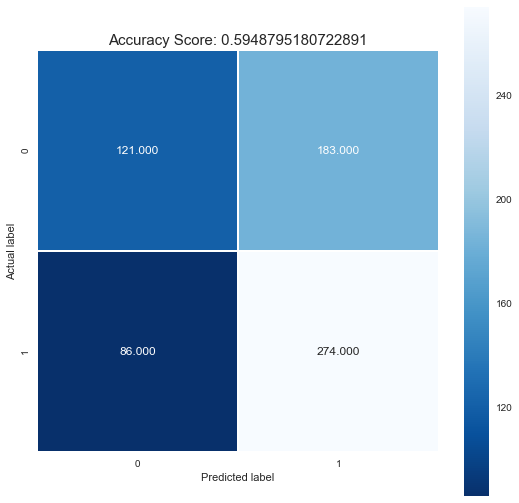

In [73]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Adaboost Predict

In [74]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

In [109]:
y=['expert_opinion']
y2=data[y]
X11=[i for i in data if i not in y]
y2
X2=data[X11]
X2.head()

,age,incorporation_type,continous_feature_1,continous_feature_2,continous_feature_3,continous_feature_4,continous_feature_5,continous_feature_6,continous_feature_7,continous_feature_8,...,continous_feature_20,continous_feature_21,continous_feature_22,continous_feature_23,continous_feature_24,continous_feature_25,continous_feature_26,continous_feature_27,continous_feature_28,continous_feature_29
0,24.0,sp_zoo,5.740930e+05,0.0,0,0.0000,0.0,0,0,0.000,...,0.0,33.00000,0.000000,1.000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
1,6.0,sp_zoo,2.270302e+04,0.0,0,-140.0000,0.0,0,0,0.000,...,0.0,37.12169,0.254098,0.864,0.827097,0.046287,0.836451,0.161334,0.896515,1.233369
2,28.0,dzialalnosc_gospodarcza,1.192940e+05,0.0,0,0.0000,-894.0,2,0,0.000,...,0.0,39.00000,0.000000,1.000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
3,55.0,dzialalnosc_gospodarcza,1.251916e+06,0.0,1,0.0000,-2360.0,1,0,0.000,...,0.0,30.00000,0.000000,1.000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
4,39.0,dzialalnosc_gospodarcza,2.266025e+05,0.0,0,-100870.2861,-88.0,1,0,-540.319,...,0.0,26.00000,1.000000,1.000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000


In [111]:
# Create adaboost-decision tree classifer object
clf = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1,
                         random_state=0)

In [116]:
# Train model
model = clf.fit(x_train, y_train)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [119]:
model.predict(x_test[0:10])

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1])

In [120]:
y_test[0:10]

,expert_opinion
689,1
824,1
925,0
2024,1
882,0
2426,1
1116,0
1282,1
1777,1
2409,1


In [121]:
model.score(x_test, y_test)

0.6310240963855421

### conculsion: some improvement in prediction

## now XGboost prediction

In [122]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [124]:

# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [126]:

# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [127]:

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 67.02%


## !!! more improvement in prediction

# Now use deep learning to predict

### smarter nn network
here its a lager network with 1st layer size 60 with 100 epochs with adam optimizer, here the result/accuracy criteria is not notive of keras but borrowed from SKlearn

In [129]:

import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [138]:
# baseline model
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(60, input_dim=48, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [146]:
# evaluate model with standardized dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X1, y1, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 60.72% (4.67%)


##### Smater NN: In this experiment, we take our baseline model with 48 neurons in the hidden layer and reduce it almost by half to 30. This will put pressure on the network during training to pick out the most important structure in the input data to model.

In [151]:
def create_smaller():
	# create model
	model = Sequential()
	model.add(Dense(30, input_dim=48, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_smaller, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X1, y1, cv=kfold)
print("Smaller: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Smaller: 60.39% (4.40%)


### larger network


In [ ]:
# larger model
def create_larger():
	# create model
	model = Sequential()
	model.add(Dense(60, input_dim=48, kernel_initializer='normal', activation='relu'))
	model.add(Dense(30, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X1, y1, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

### another native NN aproach

#### here 3 layer neural network with 12 > 8>1 dense and activation liek relu and sigmoid. Here the model functions like compile and fit are from the keras/tf native portfolio

In [152]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy

# fix random seed for reproducibility
numpy.random.seed(7)
# create model
model = Sequential()
model.add(Dense(12, input_dim=48, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X1, y1, epochs=150, batch_size=10)


Epoch 1/150
2656/2656 [==============================] - 2s 912us/step - loss: 0.6938 - acc: 0.5237
Epoch 2/150
2656/2656 [==============================] - 1s 301us/step - loss: 0.6901 - acc: 0.5467 0s - loss: 0.6900 - acc: 0.54
Epoch 3/150
2656/2656 [==============================] - 1s 295us/step - loss: 0.6892 - acc: 0.5474
Epoch 4/150
2656/2656 [==============================] - 1s 304us/step - loss: 0.6865 - acc: 0.5606
Epoch 5/150
2656/2656 [==============================] - 1s 300us/step - loss: 0.6770 - acc: 0.6066
Epoch 6/150
2656/2656 [==============================] - 1s 300us/step - loss: 0.6696 - acc: 0.6209 0s - loss: 0.6694 - acc: 0.620
Epoch 7/150
2656/2656 [==============================] - 1s 306us/step - loss: 0.6647 - acc: 0.6227
Epoch 8/150
2656/2656 [==============================] - 1s 296us/step - loss: 0.6602 - acc: 0.6197
Epoch 9/150
2656/2656 [==============================] - 1s 306us/step - loss: 0.6571 - acc: 0.6212
Epoch 10/150
2656/2656 [===============

In [153]:
# evaluate the model
scores = model.evaluate(X1, y1)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2656/2656 [==============================] - 0s 173us/step

acc: 62.95%


#### Conclusion: imporved with new approach

In [ ]:
# calculate predictions
predictions = model.predict(X1)
# round predictions
rounded = [round(x[0]) for x in predictions]
print(rounded)

# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Answers for the Test

### Q1 Familiarize yourself with the data set 
Data presented was in a raw format and had many missing values, so I did impute them and also for categorical variables I remove the rows;
###### Many for continuouse variables were actually boolean or binary or categorival variables which are not easy to deal as continuous variables for which I have convert them into dummy variables which actaully creates a sub variable for every category of the variable

### Q2 Impact of age on expert 
Impact seems not there as data didn't fit the normal distribution but with box cox transformation also
it followed somewhat normal so I performed 2 sample t-test on two data set where expert_opinion ==0 and !=0 and it revealed no significant impact, hence accepted Null hypothesis to be true

### Q3 ‘incorporation_type’ has an effect on being accepted
I performed chi square contingency test on the two variable set to understand the impact but p value sugeest no significant difference exist

### Q4 Many ‘continous_feature’ variables missing.

I did imputation assuming random distribution of the continuous data as given. For categorical variables i remove the rows with missing values

### Q5 predict ‘‘expert opinion’.
I tried Logisitic Regression (with some bug), Boosting algo (XGboost and Adaboost) and lastly 2 versions of nueral networks. I found XGboost was the best at 67%.

### Q5 steps to improve the performance of the model
1. I tried to pre-process the data by imputing missing values and coverting boolean variable to dummy variables. I also partially tried to normalise the dependent variables to remove the scaling features. I can try normalizing or stadarising the variables for avoiding scaling impact of high value variables
2. further I wish to work more on XGBoost and Nueral Network algorithms. Like for Nueral Network I can play with no. of epochs, learning rate, type of optimizers, batch size, no. of layers, no. of inputs to layers, activation functions.
3. Finally I would also like to test Convolution Neural Nets and SVM.

### Q7 Calculate the performance of the model
all the ML procedures above has performance metrics like entropy, model builin scorings above.

#### Brief explanation of approached are included above models like ogisitic Regression (with some bug), Boosting algo (XGboost and Adaboost) and lastly 2 versions of nueral networks inline